<center><img src="http://agilesoda.ai/resources/ecoletree/img/en/home/imgCi01.png"></center>
<h1 align=center><font size = 8> Lecture 1: Imitation Learning</font></h1>

# 0. Goals
- Understand definitions & notation
- Understand basic imitation learning algorithms
- Understand their strengths & weaknesses

# 1. Terminology & notation (1)
- State, action, observation, policy, Markov decision process (MDP),...
    - Fully observable: state == observation
    - Partialy observable: state != observation
![alt](../assets/img/terminology.png)

# 1. Terminology & notation (2)
- Sometimes, we can see the notations: *$x_t$* and *$u_t$* (in Robotics)
![alt](../assets/img/terminology_1.png)

# 2. Imitation: Behavioral Cloning (1)
- Colect data from human (expert system) => training the policy using collected data (supervised learning)
![alt](../assets/img/cloning.png)

# 2. Imitation: Behavioral Cloning (2)
Example from NVIDIA autonomous car:

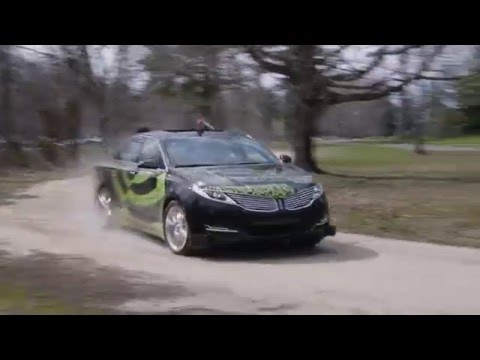

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('qhUvQiKec2U')

# 3. Practice 1: Behavioral Cloning

### 1. Goals:
- Build a model to control an Reacher using behavioral cloning method. Goal: Reacher toughes the object
- Reacher environment: 9-dimensional states and 2-dimensional actions
![alt](../assets/img/ppo2-RoboschoolReacher-v1-step-0-to-step-1000.gif)

#### **Step 1:** Getting Set Up
- Clone the project rl_continuous from gitlab: https://gitlab.com/agilesoda/rl_continuous (must be a member of agilesoda group)

```bash
git clone https://gitlab.com/agilesoda/rl_continuous.git
```

- **cd** to the *rl_continuous* folder and install independent packages from requirements file

```bash
sudo pip3 install requirement.txt
```

- **cd** to the *tested_environments/imitation_learning* folder. 

```bash
cd tested_environments/imitation_learning
```

- Run a random agent

```bash
python3 imitation.py --env RoboschoolReacher-v1 --n-timesteps 10000
```
    - --env: name of environment
    - --n-timesteps: number of timesteps

- The reward of the random agent is stored in monitor.csv file at *tested_environments/logs/random/RoboschoolReacher-v1*
- Now, we show the performance of the random agent:

In [2]:
import sys
sys.path.append('/home/tuyenple/rl_continuous/tested_environments/imitation_learning')
import imitation

reward_path = '/home/tuyenple/rl_continuous/tested_environments/logs/random/RoboschoolReacher-v1'
imitation.print_performance(reward_path)

Mean Reward: -12.46
STD Reward: 14.203612151578852


- Run an Reacher that is trained by PPO:

```bash
python3 imitation.py --env RoboschoolReacher-v1 --algo ppo2 --n-timesteps 100000
```
    - --algo: using the Reacher trained by PPO algorithm

- Similarly, we show the reward of the trained agent

In [3]:
import sys
sys.path.append('/home/tuyenple/rl_continuous/tested_environments/imitation_learning')
import imitation

reward_path = '/home/tuyenple/rl_continuous/tested_environments/logs/ppo2/RoboschoolReacher-v1'
imitation.print_performance(reward_path)

Mean Reward: 15.99
STD Reward: 9.110822184869969


#### **Step 2:** Collect data from expert.
- Collect data from expert and store to file *data.csv*

```bash
python3 imitation.py --env RoboschoolReacher-v1 --algo ppo2 --n-timesteps 100000 --no-render --collect-data
```
    - --no-render: don't show animation
    - --collect-data: store the data to file
    
- The collected data is stored in *"logs/ppo2/RoboschoolReacher-v1/data.csv"*

- Show the data. The data has 4 kind of items: expert_action, expert_observation, expert_next_observation, and expert_reward.

In [4]:
import pickle
file = open('/home/tuyenple/rl_continuous/tested_environments/logs/ppo2/RoboschoolReacher-v1/data.csv', 'rb')
datas = pickle.load(file)
# close the file
file.close()

In [5]:
# Action has 2-dimensional state
print("An action: " + str(datas['expert_action'][0]))
# An observation with 9-diemnsional state
print("An observation: " + str(datas['expert_obs'][0]))
print("A reward: " + str(datas['expert_reward'][0]))

An action: [-0.4804089 -0.3223299]
An observation: [-1.55053511  1.59679802  3.73802221 -2.0647073   0.94098011  1.11656753
 -0.141634   -1.46568956 -0.07043308]
A reward: [-0.011122]


#### **Step 3:** Build a model (clone behaviour model) that can minic the expert.
- The model has:
    - input is observation
    - output is action

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop
from keras.utils import np_utils
from numpy.random import seed
from tensorflow import set_random_seed
import numpy as np

In [7]:
input_dims = 9
output_dims = 2

model = Sequential()
model.add(Dense(output_dim=64, input_dim=input_dims, init='normal'))
model.add(Activation('relu'))
model.add(Dense(output_dim=64, input_dim=64, init='normal'))
model.add(Activation('relu'))
model.add(Dense(output_dim=output_dims, input_dim=64, init='normal'))
model.add(Activation('tanh'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640       
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 4,930
Trainable params: 4,930
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=64, input_dim=9, kernel_initializer="normal")`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=64, input_dim=64, kernel_initializer="normal")`
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=2, input_dim=64, kernel_initializer="normal")`
  if __name__ == '__main__':


In [8]:
# Devide data to training set and testing set
# We only use observation and action to train the model
obs = np.array(datas['expert_obs'])
action = np.array(datas['expert_action'])
indices = np.random.permutation(100000)
training_idx, test_idx = indices[:9000], indices[9000:10000]

# train_x, test_x = obs[:9000], obs[9000:]
# train_y, test_y = action[:90000], action[90000:]

train_x, test_x = obs[training_idx,:], obs[test_idx,:]
train_y, test_y = action[training_idx,:], action[test_idx,:]

# Train the model
model.fit(train_x, train_y, epochs=100, batch_size=128, verbose=1)

Epoch 1/100
9000/9000 [==============================] - 0s 27us/step - loss: 0.2330 - acc: 0.6463
Epoch 2/100
9000/9000 [==============================] - 0s 8us/step - loss: 0.2049 - acc: 0.6733
Epoch 3/100
9000/9000 [==============================] - 0s 8us/step - loss: 0.1920 - acc: 0.6860
Epoch 4/100
9000/9000 [==============================] - 0s 9us/step - loss: 0.1852 - acc: 0.6870
Epoch 5/100
9000/9000 [==============================] - 0s 9us/step - loss: 0.1799 - acc: 0.6999
Epoch 6/100
9000/9000 [==============================] - 0s 9us/step - loss: 0.1745 - acc: 0.7033
Epoch 7/100
9000/9000 [==============================] - 0s 9us/step - loss: 0.1701 - acc: 0.7048
Epoch 8/100
9000/9000 [==============================] - 0s 9us/step - loss: 0.1656 - acc: 0.7120
Epoch 9/100
9000/9000 [==============================] - 0s 8us/step - loss: 0.1630 - acc: 0.7151
Epoch 10/100
9000/9000 [==============================] - 0s 9us/step - loss: 0.1593 - acc: 0.7152
Epoch 11/100
9000/

- Test performance of trained model:

In [9]:
import gym
import roboschool

def test_clone_model(model, n_timesteps):
    env = gym.make('RoboschoolReacher-v1')
    obs = env.reset()
    rewards = []
    running_reward = 0
    for _ in range(n_timesteps):
        obs_batch = np.expand_dims(obs, 0)
        action = model.predict_on_batch(obs_batch)
        
        obs, reward, done, _ = env.step(action[0])

        running_reward += reward

        if done:
            rewards.append(running_reward)
#             print(running_reward)
            running_reward = 0
            obs = env.reset()

    print("Mean Reward: {:.2f}".format(np.mean(rewards)))
    print("STD Reward:", np.std(rewards))

test_clone_model(model, 10000)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: Environment '<class 'roboschool.gym_reacher.RoboschoolReacher'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.
Mean Reward: 12.01
STD Reward: 10.504587490940102


However, now we try to train the model again with more data (using 100000 samples)

In [12]:
input_dims = 9
output_dims = 2

model = Sequential()
model.add(Dense(output_dim=64, input_dim=input_dims, init='normal'))
model.add(Activation('relu'))
model.add(Dense(output_dim=64, input_dim=64, init='normal'))
model.add(Activation('relu'))
model.add(Dense(output_dim=output_dims, input_dim=64, init='normal'))
model.add(Activation('tanh'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                640       
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 130       
_________________________________________________________________
activation_6 (Activation)    (None, 2)                 0         
Total params: 4,930
Trainable params: 4,930
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=9, units=64, kernel_initializer="normal")`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=64, units=64, kernel_initializer="normal")`
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=64, units=2, kernel_initializer="normal")`
  if __name__ == '__main__':


In [13]:
# Devide data to training set and testing set
# We only use observation and action to train the model
obs = np.array(datas['expert_obs'])
action = np.array(datas['expert_action'])
indices = np.random.permutation(100000)
training_idx, test_idx = indices[:90000], indices[90000:]

# train_x, test_x = obs[:9000], obs[9000:]
# train_y, test_y = action[:90000], action[90000:]

train_x, test_x = obs[training_idx,:], obs[test_idx,:]
train_y, test_y = action[training_idx,:], action[test_idx,:]

# Train the model
model.fit(train_x, train_y, epochs=100, batch_size=128, verbose=1)

Epoch 1/100
90000/90000 [==============================] - 1s 9us/step - loss: 0.1886 - acc: 0.6901
Epoch 2/100
90000/90000 [==============================] - 1s 8us/step - loss: 0.1560 - acc: 0.7187
Epoch 3/100
90000/90000 [==============================] - 1s 8us/step - loss: 0.1493 - acc: 0.7233
Epoch 4/100
90000/90000 [==============================] - 1s 7us/step - loss: 0.1466 - acc: 0.7253
Epoch 5/100
90000/90000 [==============================] - 1s 7us/step - loss: 0.1445 - acc: 0.7267
Epoch 6/100
90000/90000 [==============================] - 1s 7us/step - loss: 0.1437 - acc: 0.7275
Epoch 7/100
90000/90000 [==============================] - 1s 7us/step - loss: 0.1431 - acc: 0.7282
Epoch 8/100
90000/90000 [==============================] - 1s 9us/step - loss: 0.1425 - acc: 0.7280
Epoch 9/100
90000/90000 [==============================] - 1s 8us/step - loss: 0.1421 - acc: 0.7297
Epoch 10/100
90000/90000 [==============================] - 1s 8us/step - loss: 0.1416 - acc: 0.7294

90000/90000 [==============================] - 1s 6us/step - loss: 0.1369 - acc: 0.7341
Epoch 83/100
90000/90000 [==============================] - 1s 8us/step - loss: 0.1370 - acc: 0.7338
Epoch 84/100
90000/90000 [==============================] - 1s 11us/step - loss: 0.1370 - acc: 0.7341
Epoch 85/100
90000/90000 [==============================] - 1s 8us/step - loss: 0.1371 - acc: 0.7335
Epoch 86/100
90000/90000 [==============================] - 1s 7us/step - loss: 0.1370 - acc: 0.7336
Epoch 87/100
90000/90000 [==============================] - 1s 8us/step - loss: 0.1370 - acc: 0.7336
Epoch 88/100
90000/90000 [==============================] - 1s 7us/step - loss: 0.1370 - acc: 0.7327
Epoch 89/100
90000/90000 [==============================] - 1s 7us/step - loss: 0.1369 - acc: 0.7340
Epoch 90/100
90000/90000 [==============================] - 1s 8us/step - loss: 0.1369 - acc: 0.7340
Epoch 91/100
90000/90000 [==============================] - 1s 8us/step - loss: 0.1370 - acc: 0.7340
Ep

In [14]:
evaluation = model.evaluate(test_x, test_y, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 0s 16us/step
Summary: Loss over the test dataset: 0.14, Accuracy: 0.73


In [15]:
test_clone_model(model, 10000)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Mean Reward: 8.67
STD Reward: 11.176531608139902


# 4. Limitation of Behavioral Cloning
- Depend on the expert systems (human) and cannot exceed the level of the expert systems
- Distributional "drift" problem (E.g. Distribution mismatch problem)

![alt](../assets/img/improve_cloning.png)

# 5. DAgger (Dataset Aggregation)
- DAgger algorithm reduces the mismatch between training data and experimence data
- Approach:
    + Human and clone model work together
    + Ask human to label the data executed by clone model

![alt](../assets/img/dagger.png)

# 6. Practice 2: Improve Behavioral Cloning using DAgger method

#### Goals:
- Implement Dagger method to improve the model.
- The implementation as follow (see the file *imitation.py* in gitlab):

#### **Step 1:** Create clone model and expert model
- Clone model has the same the model used above

```python
clone_model = create_clone_model()
```

- Expert model is from PPO algorithm

```python
expert_model = ALGOS['ppo2'].load('/path/to/expert/model.pkl', env=env)
```

#### **Step 2:** Loop 10 times and train the clone model
- Generating the data and labeled the data that is executed by expert model
- *fraction_assist*: 

```python
obs, actions = generate_datas(env, expert_model, clone_model, fraction_assist, num_datas=100)
```

```python
def generate_datas(env, expert_policy, clone_policy, fraction_assist, num_datas):
    observations = []
    actions = []
    returns = []
    for i in range(num_datas):
        obs = env.reset()
        done = False
        totalr = 0.
        steps = 0
        while not done:

            # label expert data
            label = False
            if (fraction_assist > random.random()):
                action = expert_policy.predict(obs)
                label = True
                action = action[0]
            else:
                action = clone_policy.predict(obs)

            if (label == True):
                observations.append(obs[0])
                actions.append(action[0])

            obs, r, done, _ = env.step(action)
            totalr += r
            steps += 1

        returns.append(totalr)

    print('Return summary: mean=%f, std=%f' % (np.mean(returns), np.std(returns)))

    return observations, actions
```

- Only keep the last 30.000 data sample

```python
if (len(labeled_obs) > 30000):
    labeled_obs = labeled_obs[len(labeled_obs)-30000:]
    labeled_actions = labeled_actions[len(labeled_actions)-30000:]
```

- Train the clone model with labeled data and evaluate the model

```python
clone_model.fit(np.array(labeled_obs), np.array(labeled_actions), epochs=100, batch_size=128, verbose=0)
test_clone_model(clone_model, 10000, render=False)
```

- Now, run the function and see the result

In [17]:
import sys
sys.path.append('/home/tuyenple/rl_continuous/tested_environments/imitation_learning')
import imitation

model = imitation.dagger()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
INFO:tensorflow:Summary name model/pi_fc0/w:0 is illegal; using model/pi_fc0/w_0 instead.
INFO:tensorflow:Summary name model/pi_fc0/b:0 is illegal; using model/pi_fc0/b_0 instead.
INFO:tensorflow:Summary name model/vf_fc0/w:0 is illegal; using model/vf_fc0/w_0 instead.
INFO:tensorflow:Summary name model/vf_fc0/b:0 is illegal; using model/vf_fc0/b_0 instead.
INFO:tensorflow:Summary name model/pi_fc1/w:0 is illegal; using model/pi_fc1/w_0 instead.
INFO:tensorflow:Summary name model/pi_fc1/b:0 is illegal; using model/pi_fc1/b_0 instead.
INFO:tensorflow:Summary name model/vf_fc1/w:0 is illegal; using model/vf_fc1/w_0 instead.
INFO:tensorflow:Summary name model/vf_fc1/b:0 is illegal; using model/vf_fc1/b_0 instead.
INFO:tensorflow:Summary name model/vf/w:0 is illegal; using model/vf/w_0 instead.


/home/tuyenple/rl_continuous/tested_environments/imitation_learning/imitation.py:68: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=9, units=64, kernel_initializer="normal")`
  model.add(Dense(output_dim=64, input_dim=input_dims, init='normal'))
/home/tuyenple/rl_continuous/tested_environments/imitation_learning/imitation.py:70: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=64, units=64, kernel_initializer="normal")`
  model.add(Dense(output_dim=64, input_dim=64, init='normal'))
/home/tuyenple/rl_continuous/tested_environments/imitation_learning/imitation.py:72: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=64, units=2, kernel_initializer="normal")`
  model.add(Dense(output_dim=output_dims, input_dim=64, init='normal'))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                640       
_________________________________________________________________
activation_10 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
activation_11 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 130       
_________________________________________________________________
activation_12 (Activation)   (None, 2)                 0         
Total params: 4,930
Trainable params: 4,930
Non-trainable params: 0
_________________________________________________________________
DAgger i

- Run the clone model 

In [19]:
imitation.test_clone_model(model, 10000, render=True)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Mean Reward: 12.03
STD Reward: 10.055411110627333


# 7. When do we fail to use imitation learning? (1)
- The problem (environment) is a non-Markovian behavior
- Multimodel behavior
![alt](../assets/img/fail.png)

# 8. How to deal with Non-markovian behavior (1)
- Using a stack of multiple frames
![alt](../assets/img/stack.png)

# 8. How can we deal with Non-markovian behavior? (2)
- Using Recurrent Neural Network (RNN)
![alt](../assets/img/rnn.png)

## 9. When do we fail to use imitation learning? (2)
- Multimodel behavior. Some solutions here are:
    - Gaussian mixture model
    - Latent variable model
    - Autoregressive discretization
![alt](../assets/img/fail_2.png)

# 10. Conclusion: Imitation Learning
- Work best for the problems which have a stable distribution
- Collecting data from expert systems (human) and using supervised learning to training the model
- Disadvantages: distribution mismatch problem
- How to improve:
    + Dagger approach: ask human to label the data during training
- However, imitation learning contains some limitations:
    - Humans need to provide data for learning
    - Humans are not good at providing some kinds of actions
    - Learned model cannot be better than human
![alt](../assets/img/recap.png)

# 11. Do it by your self
- Practice imitation learning algorithms by yourself (I think it is quite similar to supervised learning)
- Select any trained environments from the gitlab repositories:

Env | Env | Env | Env | Env
- | - | - | - | -
![alt](../assets/img/ppo2-RoboschoolInvertedDoublePendulum-v1-step-0-to-step-1000.gif) | ![alt](../assets/img/BipedalWalker-v2.gif) | ![alt](../assets/img/ppo2-BipedalWalkerHardcore-v2-step-0-to-step-1000.gif) | ![alt](../assets/img/ppo2-LunarLanderContinuous-v2-step-0-to-step-1000.gif) | ![alt](../assets/img/ppo2-MinitaurBulletEnv-v0-step-0-to-step-1000.gif)
![alt](../assets/img/ppo2-RoboschoolAnt-v1-step-0-to-step-1000.gif) | ![alt](../assets/img/ppo2-RoboschoolHalfCheetah-v1-step-0-to-step-1000.gif) | ![alt](../assets/img/ppo2-RoboschoolHopper-v1-step-0-to-step-1000.gif) | ![alt](../assets/img/ppo2-RoboschoolHumanoidFlagrun-v1-step-0-to-step-1000.gif) | ![alt](../assets/img/ppo2-RoboschoolHumanoid-v1-step-0-to-step-1000.gif)
![alt](../assets/img/ppo2-RoboschoolInvertedPendulumSwingup-v1-step-0-to-step-1000.gif) | ![alt](../assets/img/ppo2-RoboschoolReacher-v1-step-0-to-step-1000.gif) | ![alt](../assets/img/ppo2-RoboschoolWalker2d-v1-step-0-to-step-1000.gif) | ![alt](../assets/img/ppo2-RoboschoolHumanoidFlagrun-v1-step-0-to-step-1000.gif) | ![alt](../assets/img/ppo2-RoboschoolHumanoid-v1-step-0-to-step-1000.gif)

## Case studies (1)
- Case study 1: **A Machine Learning Approach to Visual Perception of Forest Trails for Mobile Robots** *IEEE Robotics and Automation Letters (RA-L)*, pages 661 - 667, 2016

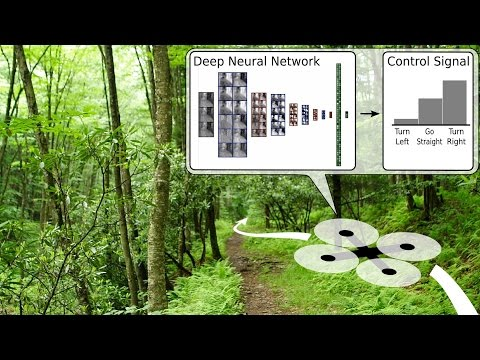

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('umRdt3zGgpU')

# References
1. David Silver Course: http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching.html
2. Practical Reinforcement Learning Coursera
3. Berkeley Deep Learning Course: http://rail.eecs.berkeley.edu/deeprlcourse